# EDA on housing.csv

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Läser in filen housing.csv och skapar en första överblick

In [53]:
housing = pd.read_csv("housing.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Reflektion:** Ett dataset med 10 olika kolumner med värden som handlar om bostäder, invånare, priser, i viss mån kanske också levnadsstandard med tanke på median_income, total_rooms och population.
Men, total_bedrooms saknar en hel del värden. Jag vill hantera det först.

In [54]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [55]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [56]:
# Checking how many empty values there are in total_bedrooms
housing["total_bedrooms"].isnull().sum() 

207

**Reflektion** 
- Det är 205 värden som saknar i kolumnen total_bedrooms. Med totalt 20640 värden skulle jag kunna droppa de raderna, men jag väljer att fylla i dem med ett medelvärde jag baserar på genomsnittliga total_bedrooms per total_rooms. 
Det finns en fallgrop här, och det är att jag gör detta innan jag hanterat extrema värden i total_rooms och total_bedrooms. 
- ocean_proximity är dtype object och skulle kunna visualiseras med ett histogram
- Jag vill använda boxplot på housing_median_age, total_rooms, total_bedrooms,median_income och median_house_value
- Jag vill visualisera det geografiskt i och med att latitude och longitude är med, och med hjälp av färg kan jag visualisera läget jämfört med huspriser, median_lön men också om det är nära vatten eller inte.



In [57]:
# Enriching empty values in total_bedroom column
# Dividing the sum of bedrooms with the sum of rooms, to get the average amount of bedrooms per room
ratio_bedroom_per_room = housing["total_bedrooms"].sum() / housing["total_rooms"].sum() 
print(f"Ratio for nr of bedrooms per room: {ratio_bedroom_per_room}")

# Enriching empty values in column total_bedrooms with the ratio defined above
def fill_nAn_bedrooms(housing):
    housing["total_bedrooms"] = housing["total_bedrooms"].fillna(housing["total_rooms"] * ratio_bedroom_per_room)
    return housing
housing = fill_nAn_bedrooms(housing) 

# Checking if the enrichment is done
print(f"NULL-values in total_bedrooms: {housing["total_bedrooms"].isnull().sum()}")

Ratio for nr of bedrooms per room: 0.2020197547339581
NULL-values in total_bedrooms: 0


### Histogram för ocean_proximity

<BarContainer object of 5 artists>

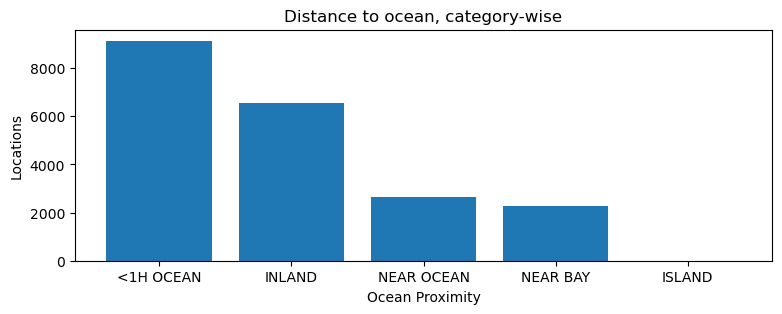

In [58]:
ocean_proximity = housing["ocean_proximity"].value_counts()

fig, ax = plt.subplots(figsize=(9, 3))
ax.set(title="Distance to ocean, category-wise", xlabel="Ocean Proximity", ylabel="Locations")
ax.bar(x=ocean_proximity.index, height=ocean_proximity.values)

**Reflektion**
De allra flesta ligger i inlandet eller mer än en timme från havet. Kan vara värt att undersöka om det finns en korrelation mellan huspriser i de olika kategorierna.

### Boxplots

<Axes: >

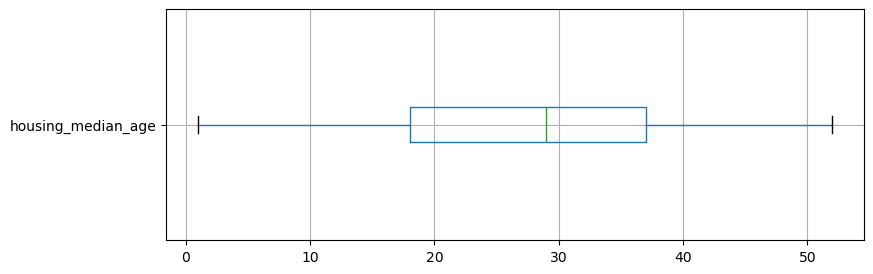

In [59]:
housing.boxplot(column="housing_median_age", figsize= (9, 3), vert=False)

<Axes: >

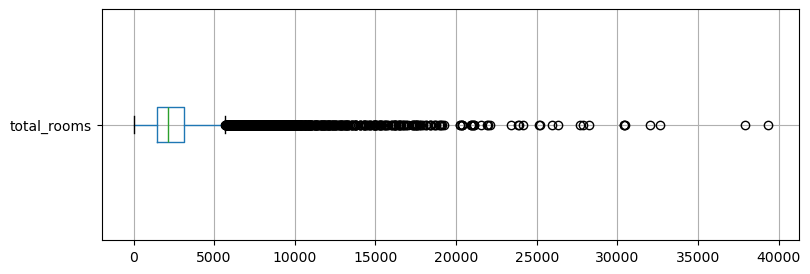

In [60]:
housing.boxplot(column="total_rooms", figsize= (9, 3), vert=False)

**Reflektion**
Den är ser sned-fördelad ut med misstänkta galna värden som riskerar att störa min analys. 
Åtgärd, kapa bort outliers genom att bara ta med värden upp till 20000 kanske?

<Axes: >

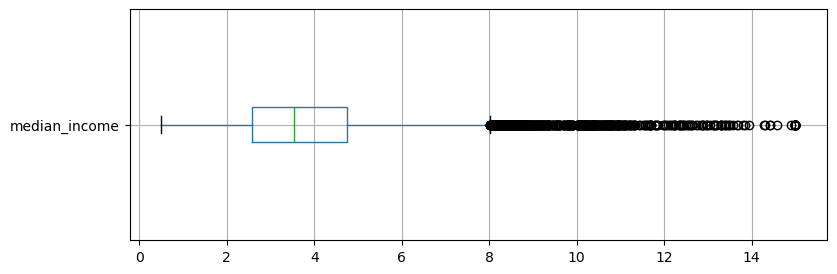

In [61]:
housing.boxplot(column="median_income", figsize= (9, 3), vert=False)

**Reflektion**
Också en ganska sned-fördelad spridningen, med en hel del outliers utprickade med median_inkomster. Dessa kan dock fortfarande vara relevanta vid geografisk analys.

<Axes: >

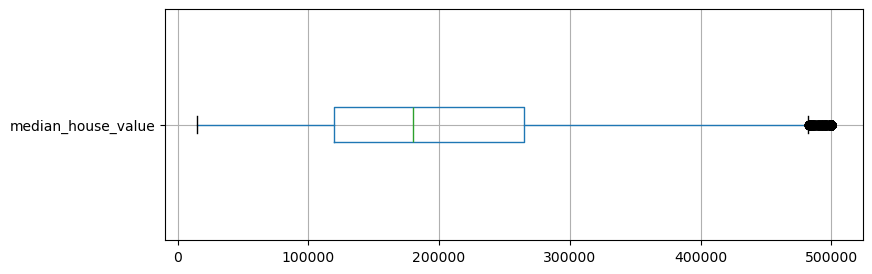

In [62]:
housing.boxplot(column="median_house_value", figsize= (9, 3), vert=False)

**Reflektioner**
Här återfinns många extremvärden med huspriser som ser att vara mycket högre än den stora massa. Däremot misstänker jag att de värdena kanske är högre, men är neddragna till max-nivån som i deras fall är satt för lågt.
Jag tar den insikten med mig, och gör en annan analys där jag utgår från ålder för att titta lite närmare på datan. 

<Axes: >

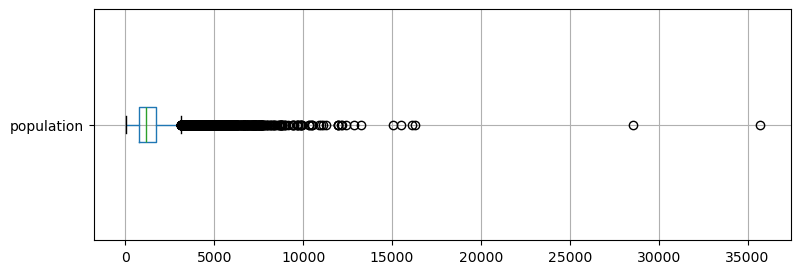

In [63]:
housing.boxplot(column="population", figsize=(9, 3), vert=False)

**Reflektion**
Här ser jag en stor förskjutning, mycket tack vare några extremvärden. Det kan antingen vara felaktigt, eller ett område med väldigt mycket människor.

### 1 - "Age and income" "Age and House value" "Age and Total rooms"

1.0 52.0
0.4999 15.0001
14999.0 500001.0
2.0 39320.0


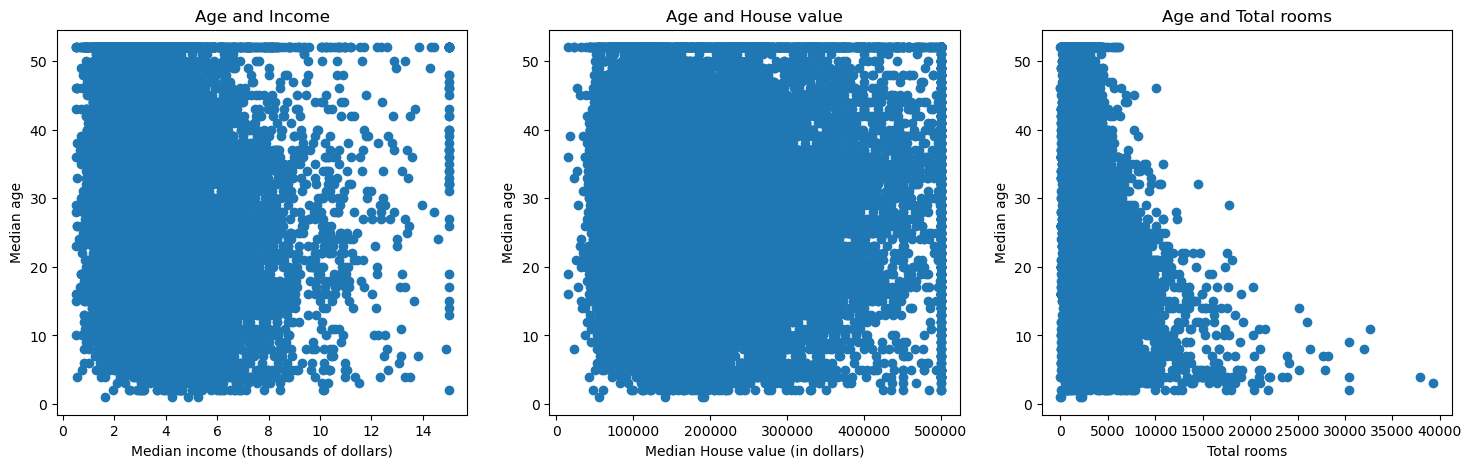

In [64]:
# I will do a visual comparizon regarding the age and median_income, house value and total_rooms.

# Checking min and max values for easy access
print(housing["housing_median_age"].min(), housing["housing_median_age"].max())
print(housing["median_income"].min(), housing["median_income"].max())
print(housing["median_house_value"].min(), housing["median_house_value"].max())
print(housing["total_rooms"].min(), housing["total_rooms"].max())


y_median_age = housing["housing_median_age"]
x_median_income = housing["median_income"]
x_median_house_value = housing["median_house_value"]
x_total_rooms = housing["total_rooms"]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].set(title="Age and Income", xlabel="Median income (thousands of dollars)", ylabel="Median age")  
ax[0].scatter(x_median_income, y_median_age)

ax[1].set(title="Age and House value", xlabel="Median House value (in dollars)", ylabel="Median age" )  
ax[1].scatter(x_median_house_value, y_median_age)

ax[2].set(title="Age and Total rooms", xlabel="Total rooms", ylabel="Median age")  
ax[2].scatter(x_total_rooms, y_median_age)

**Reflektion: 1 "Age and Income" "Age and House value" "Age and Total rooms"**

Jag tycker mig se att för både husvärden och ålder är många värden i ytterkant. Alltså ute som max-värde. Jag funderar på om att det kan vara så att data-insamlinen har tagit med alla åldrar äldre än 52 som just 55? Och samma för husvärdena, där alla områden med priser högre än 500'001 inte tagits med. Jag tänker att det finns en osäkerhet här, tittar jag på datan tror jag att de tagits med men som maxvärdet. Vilket gör att det blir den skarpa kanten i "Age and House value", både i ålder och huspriser. 
Hur skulle det se ut om jag inte tog med Max-värdena, och vilka faror finns med att göra det?


### 2 "Age and Income" "Age and House value" "Age and Total rooms"

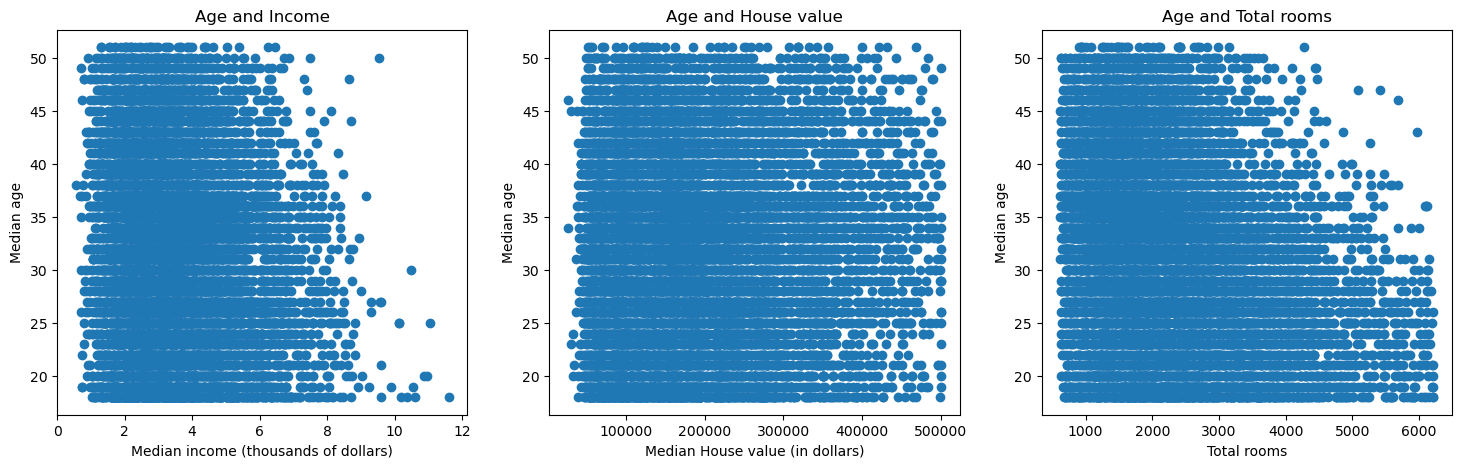

In [65]:
# I will do a visual comparizon in these ranges:
# 18 < housing_median_age > 52 # im not sure about 18 since it is America. But my aim is to remove youths and kids from the comparizon.
# 0 < median_income > 15.001 # To take all values except the max_values
# 14999 < median_house_value > 500001.0 # Excepting minimum value and maximum value
# 5% < total_rooms > 95% # Using percentage to cut off outliers. 

# Creating a copy of the dataframe for manipulating the data, and keeping the shape of the axis corresponding.
under5 = housing["total_rooms"].quantile(0.05)
above95 = housing["total_rooms"].quantile(0.95)

trimmed_housing = housing[
    (housing["housing_median_age"] > 17) &
    (housing["housing_median_age"] < 52) &
    (housing["median_income"] < 15.001) &
    (housing["median_house_value"] > 14999) &
    (housing["median_house_value"] < 500001) &
    (housing["total_rooms"] > under5) &
    (housing["total_rooms"] < above95)
].copy() 

y_median_age = trimmed_housing["housing_median_age"]
x_median_income = trimmed_housing["median_income"]
x_median_house_value = trimmed_housing["median_house_value"]
x_total_rooms = trimmed_housing["total_rooms"]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].set(title="Age and Income", xlabel="Median income (thousands of dollars)", ylabel="Median age")  
ax[0].scatter(x_median_income, y_median_age)

ax[1].set(title="Age and House value", xlabel="Median House value (in dollars)", ylabel="Median age" )  
ax[1].scatter(x_median_house_value, y_median_age)

ax[2].set(title="Age and Total rooms", xlabel="Total rooms", ylabel="Median age")  
ax[2].scatter(x_total_rooms, y_median_age)

**Reflektion: 2 "Age and Income" "Age and House value" "Age and Total rooms"**

Nu ser tabellerna bättre ut och det går lite lättare att få en uppfattning av datan.
Reflektioner - "Age and Income":
- En annan tabelltyp hade varit bättre om jag vill fördjupa mig mer i det förhållandet, och kanske satt åldern på x-axeln istället.
- Skulle jag göra om det skulle jag kanske ta bort mer av outliers, och bara ta med värden upp till 9.

Reflektioner - "Age and House value"
- Den här plottningen säger mig inte så mycket, skulle jag göra om den skulle jag kanske använda histogram och sätta åldersspann och titta på husvärden.

Reflektioner - "Age and Total rooms"
- Här tycker jag mig se en antydning till att det finns fler rum i områden där medelåldern är lägre. 


### 3 Geografisk placering, husvärde och inkomst.

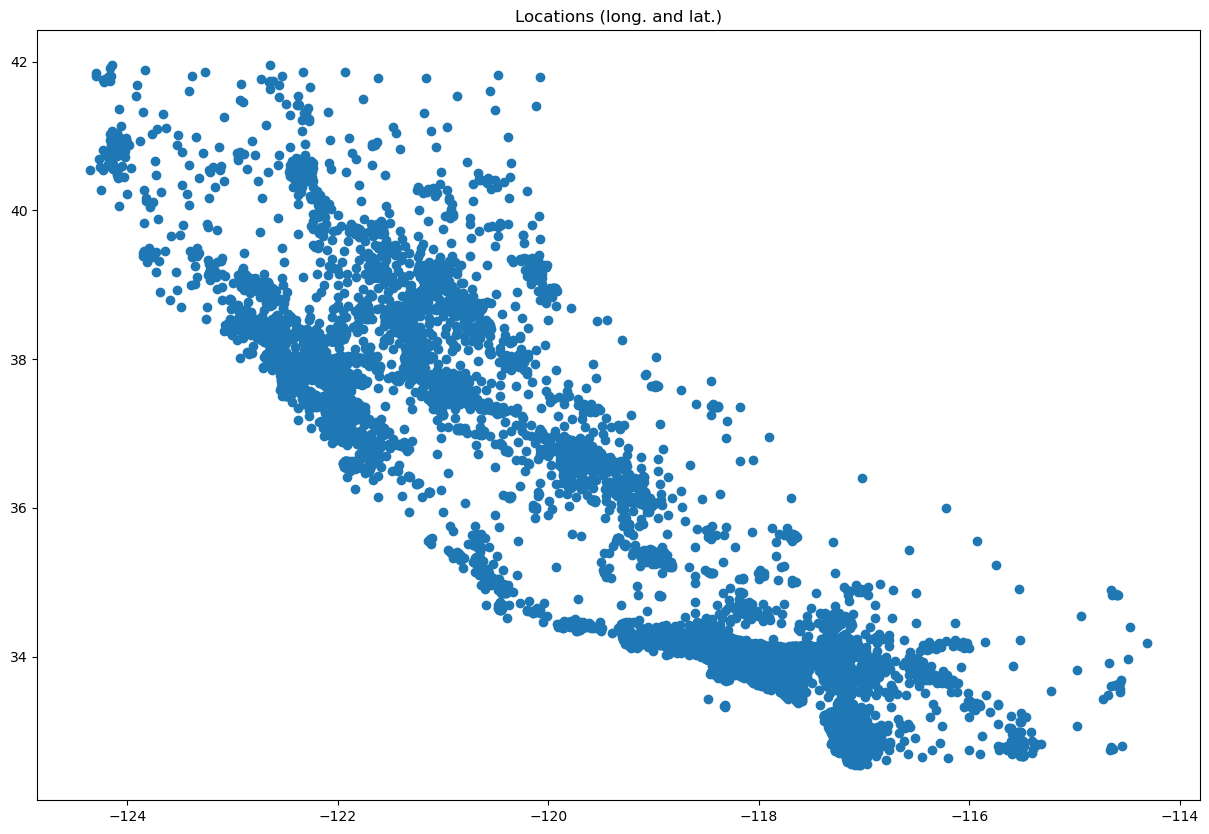

In [66]:
# A visualization to plot out the longitud and latitud on a map

longitude = housing["longitude"]
latitude = housing["latitude"]

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(title="Locations (long. and lat.)")
ax.scatter(longitude, latitude)


[Text(0.5, 1.0, 'Geographic spred and House values'),
 Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude')]

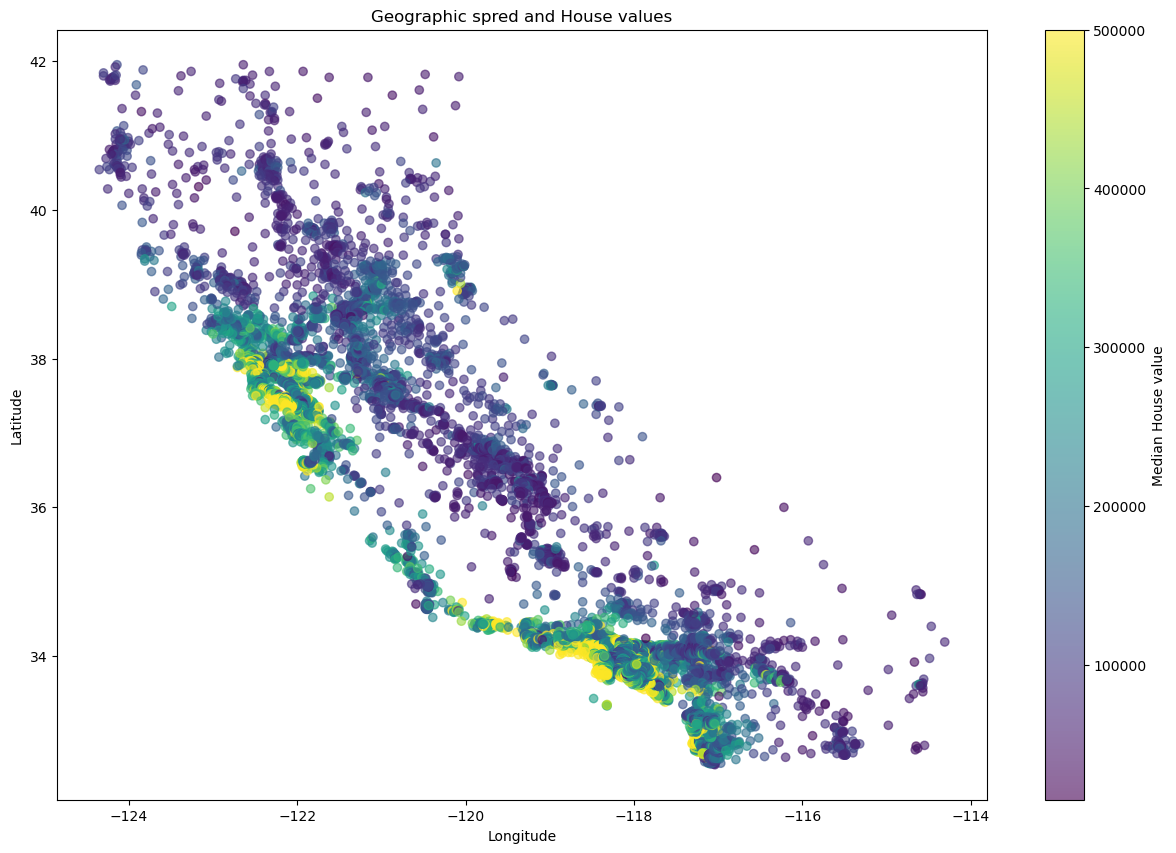

In [67]:
# Same visualization as above, but with added values for median_house_value

longitude = housing["longitude"]
latitude = housing["latitude"]
house_value = housing["median_house_value"]

fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(longitude, latitude, c=house_value, cmap="viridis", alpha=0.6)
plt.colorbar(scatter, label="Median House value")
ax.set(title="Geographic spred and House values", xlabel="Longitude", ylabel="Latitude")


**Reflektion**
Den här vyn ger mig information om att områden med höga huspriser ligger närmare kusten, och när jag jämför med en geografisk karta verkar priserna vara högre runt Los Angeles och San Fransisco.
Jag ska nu kolla om de stämmer överens med populationen i nästa tabell:

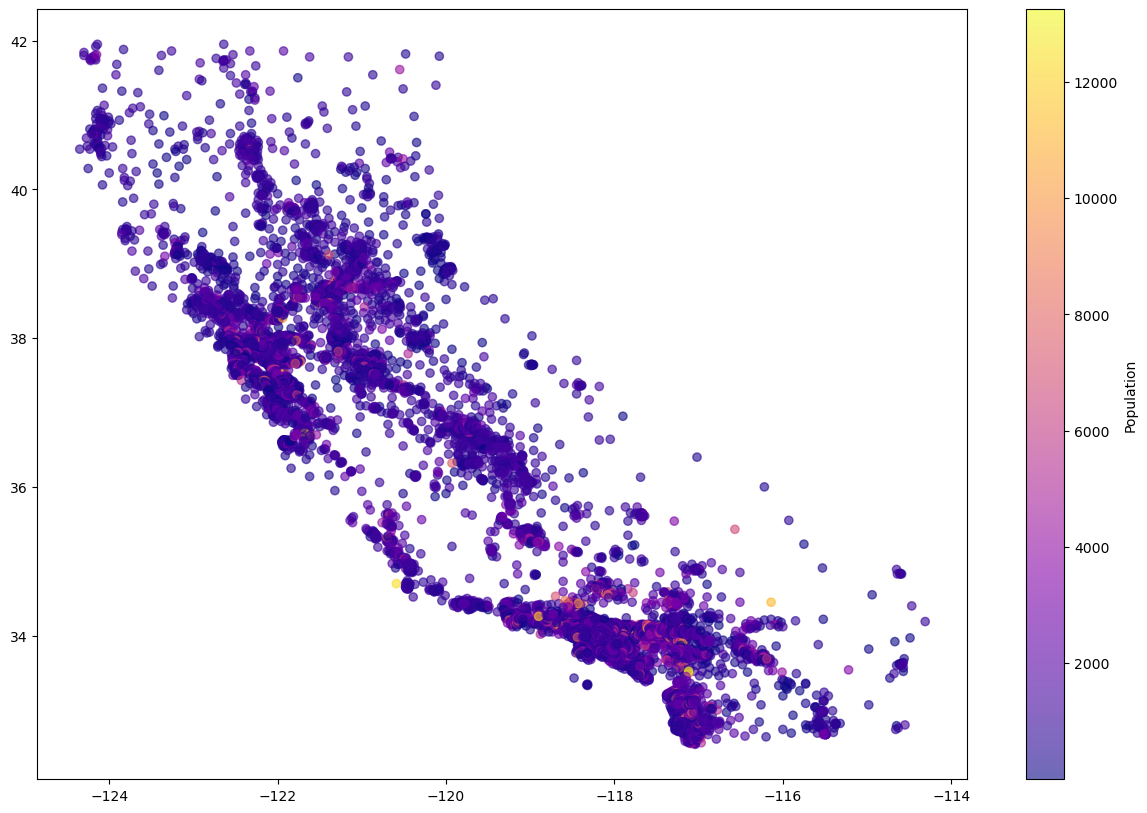

In [68]:
# Same visualization as above, but with population instead of median_house_value
# Since my boxplot showed a few outliers i will only use values between 0 and 15000, for better visualization


geo_trimmed_housing = housing[
    (housing["population"] > 0) &
    (housing["population"] < 15000)
    ].copy()

longitude = geo_trimmed_housing["longitude"]
latitude = geo_trimmed_housing["latitude"]
population = geo_trimmed_housing["population"]

fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(longitude, latitude, c=population, cmap="plasma", alpha=0.6) # Changing the color-scheme to contrast better. 
plt.colorbar(scatter, label="Population")

**Reflektion** 
Vid jämförelse med geografisk karta kan jag se var det bor flest människor. För att analysera denna bättre skulle jag behöva gå ner och titta områdesvis kanske. 
Eller visualisera de med hög population till exempel. Men jag lämnar det för nu. 

## Diskussion
I denna EDA har jag undersökt bostadsdata från Kalifornien utifrån flera perspektiv. Jag började med att identifiera och åtgärda saknade värden, och valde att fylla dem med ett rimligt genomsnitt baserat på befintlig data, jag anser i efterhand att jag kanske skulle ha tagit bort extremvärden innan jag fyllde i de tomma värdena. Om jag hade tagit bort dessa Outliers innan jag räknade ut medelvärdet för total_bedrooms hade det blivit mer representativt för datan. Det var en viktig insikt som jag tar med mig.

Därefter använde jag histogram och boxplots för att analysera fördelningar och identifiera extremvärden (outliers). Jag valde att använda scatterplots och boxplots eftersom de tydligt visar fördelningar och samband, och geografiska visualiseringar för att upptäcka mönster kopplade till plats. Dessa metoder gav mig en snabb överblick och hjälpte mig att identifiera intressanta områden för vidare analys.

Jag använde scatterplots för att undersöka relationen mellan medianålder och variabler som inkomst, huspris och antal rum, och såg att vissa av dessa relationer påverkas av outliers och datacapping, vilket jag delvis hanterade genom att filtrera bort extrema värden. Det förbättrade läsbarheten men skapade också en medveten begränsning i analysens omfattning.

Genom att visualisera geografiska samband med hjälp av longitude och latitude, kunde jag se hur faktorer som huspriser och befolkning fördelas över kartan – där områden nära kusten och vid storstäder tydligt stack ut som mer värdefulla och tätbefolkade.

Korrelationsmatrisen visade bland annat ett starkt positivt samband mellan medianinkomst och huspriser, vilket bekräftar en intuitiv koppling mellan inkomstnivå och bostadsvärde. Det fanns också intressanta, men svagare, samband mellan exempelvis antal hushåll och population, vilket är logiskt men ändå värt att bekräfta visuellt.

**Om jag skulle fortsätta arbetet hade jag velat:**

- Djupare analysera hur olika faktorer påverkar huspriser beroende på ocean_proximity
- Dela upp geografiska områden tydligare (t.ex. Norra/Södra Kalifornien)
- Undersöka fler kombinationer av variabler med t.ex. facetterade plots eller interaktiva visualiseringar

Sammanfattningsvis har jag fått en bra överblick över datans struktur, fördelningar och samband. Arbetet visar också att det krävs medvetna val i varje steg för att få fram insikter utan att bli vilseledd av extrema eller ofullständiga värden. Jag upplever också ett behov av att fördjupa mina kunskaper i hur jag trimmar datan för få ett mer representativt men fortfarande fullt relevant urval av data.

## Självutvärdering 
-----------------------------
I slutet av koden ska du genomföra en självutvärdering där du besvarar följande tre frågor: 
1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det?

**Inte så mycket i själva kodningen och uppggifterna, de har varit utmanande helt klart men full görbara. De inspelade lektionerna, tillsammans med boken har gjort det fullt möjligt att studera ikapp på egen hand. Det svåra var att kursstarten krockade med en försenad GO-Live på jobbet. Det gjorde att jag kände mig tvungen att fokusera på det, och skjuta upp studierna.**

2. Vilket betyg anser du att du ska ha och varför? 

**G, jag anser nog att mina analyser och genomförande kanske kan luta åt högre. Men jag hade velat vara med i större utsträckning i diskussionerna på lektionerna, och kanske att jag missat något i min analys. Nu är det förvisso inte med i Betygskriterierna. Men jag halkade efter tidsmässigt och jag är nöjd om jag får godkänt.** 

3. Något du vill lyfta fram till Antonio?

**Proffsigt och fokuserat genomförda lektioner med tydliga läromedel och en tydlig progressions-struktur. Jag upplevde att det var lättjobbat rakt igenom, och tydligt. Ser mycket framemot hösten.**

Text(0.5, 1.0, 'Korrelationsmatris')

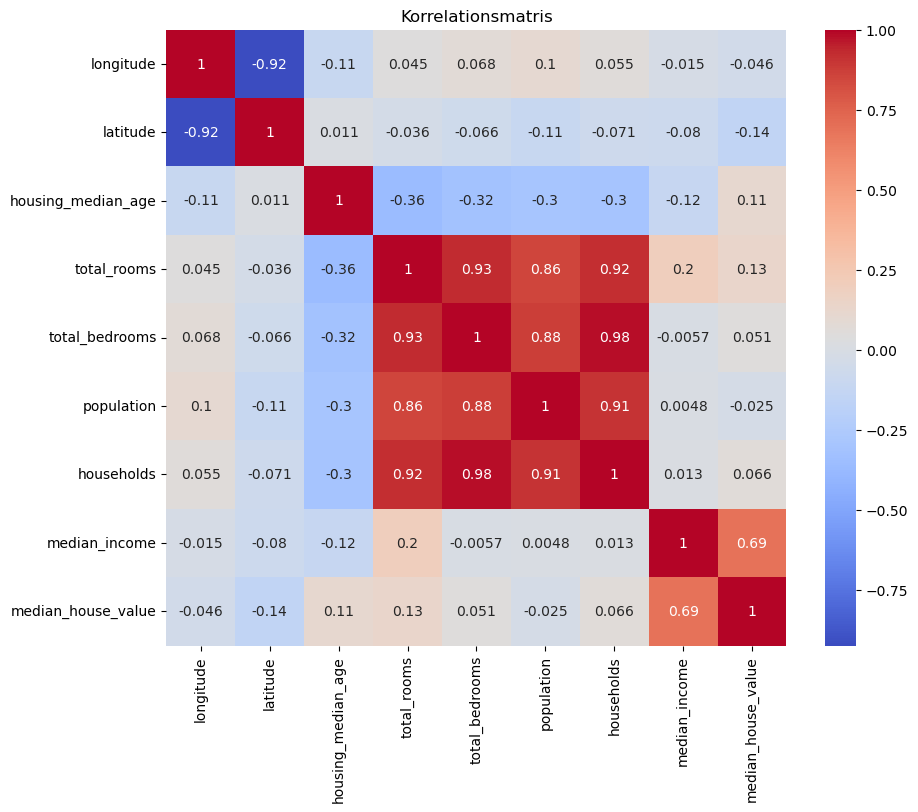

In [69]:
# Trying out Correlation view to have a look. 

plt.figure(figsize=(10, 8))
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korrelationsmatris")